### IMPORTING LIBRARIES

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.model_selection import train_test_split,  RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Desktop\\BigBasket Products.csv")
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


### **Dataset Description: BigBasket Products**
This dataset contains **27,555** rows and **10** columns, providing information about various products available on BigBasket, an online grocery and household items retailer.

#### **Columns Description:**
1. **index** *(int)*: Unique identifier for each product.
2. **product** *(string)*: Name of the product.
3. **category** *(string)*: High-level category the product belongs to (e.g., Beauty & Hygiene, Cleaning & Household).
4. **sub_category** *(string)*: More specific sub-category of the product (e.g., Hair Care, Skin Care).
5. **brand** *(string)*: Brand name of the product.
6. **sale_price** *(float)*: Discounted price of the product.
7. **market_price** *(float)*: Original market price of the product.
8. **type** *(string)*: Further classification of the product (e.g., Hair Oil & Serum, Bathing Bars & Soaps).
9. **rating** *(float, nullable)*: Customer rating (range: 1.0 to 5.0). Some values are missing.
10. **description** *(string, nullable)*: Brief description of the product.

#### **Key Insights:**
- **Categories:** 11 unique categories, with "Beauty & Hygiene" being the most frequent.
- **Subcategories:** 90 unique subcategories.
- **Brands:** 2,313 different brands, with "Fresho" being the most common.
- **Price Range:** Sale prices vary from **₹2.45** to **₹12,500**.
- **Ratings:** Available for 18,929 products (some products do not have ratings).
- **Descriptions:** 27,440 products have descriptions, but some are missing.

In [3]:

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  
df['rating'] = df['rating'].fillna(0) 
df['rating'] = df['rating'].round().astype(int)

In [4]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",4,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4,Nivea Creme Soft Soap gives your skin the best...


In [5]:
df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [6]:
df1 = df.groupby('product').mean(numeric_only=True)
df1


,index,sale_price,market_price,rating
product,,,,
& Moms - Citrus Soap,15871.0,195.00,195.0,4.0
& Moms - Sandal Soap,25792.0,108.00,120.0,4.0
& Moms Bathing Soap - Jasmine,78.0,108.00,120.0,5.0
& Moms Bathing Soap - Tulsi,3073.0,108.00,120.0,4.0
0.0 Non Alcoholic Beer,6183.0,56.25,75.0,4.0
...,...,...,...,...
oriental Instant Noodles - Curry Flavour,19285.0,36.00,40.0,4.0
oriental Instant Noodles - Masala Flavour,24248.0,36.00,40.0,4.0
oriental Instant Noodles - Tom Yam Flavour,7435.0,36.00,40.0,4.0


In [7]:
len(df1[df1.rating>3])


13228

In [8]:
df['description'] = df['description'].fillna('')

### Find Sentiment on Text(Reviews)

In [9]:

def sentiment_calc(text):
    return TextBlob(text).sentiment.polarity 
df['Sentiment'] = df['description'].apply(sentiment_calc)
df


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Sentiment
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4,This Product contains Garlic Oil that is known...,0.166667
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2,"Each product is microwave safe (without lid), ...",0.450000
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3,"A perfect gift for all occasions, be it your m...",0.522619
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",4,Multipurpose container with an attractive desi...,0.285776
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4,Nivea Creme Soft Soap gives your skin the best...,0.383333
...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,4,Layerr brings you Wottagirl Classic fragrant b...,0.432540
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4,Puramate rosemary is enough to transform a dis...,0.250000
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,4,We have taken the richness of Sweet Potatoes (...,0.454762
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4,"Tetley Green Tea with its refreshing pure, ori...",0.118929


### Apply Multiplication B/W Rating&Sentiment

In [10]:
df['Updated_score'] = df['rating']*df['Sentiment']
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Sentiment,Updated_score
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4,This Product contains Garlic Oil that is known...,0.166667,0.666667
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2,"Each product is microwave safe (without lid), ...",0.450000,0.900000
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3,"A perfect gift for all occasions, be it your m...",0.522619,1.567857
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",4,Multipurpose container with an attractive desi...,0.285776,1.143104
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4,Nivea Creme Soft Soap gives your skin the best...,0.383333,1.533333
...,...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,4,Layerr brings you Wottagirl Classic fragrant b...,0.432540,1.730159
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4,Puramate rosemary is enough to transform a dis...,0.250000,1.000000
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,4,We have taken the richness of Sweet Potatoes (...,0.454762,1.819048
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4,"Tetley Green Tea with its refreshing pure, ori...",0.118929,0.475714


### Make Unnamed into Normal Form

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df.columns = df.columns.str.strip()
le = LabelEncoder()
df.index = le.fit_transform(df.index.astype(str))
df.head()


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Sentiment,Updated_score
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4,This Product contains Garlic Oil that is known...,0.166667,0.666667
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2,"Each product is microwave safe (without lid), ...",0.450000,0.900000
11112,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3,"A perfect gift for all occasions, be it your m...",0.522619,1.567857
19778,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",4,Multipurpose container with an attractive desi...,0.285776,1.143104
20889,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4,Nivea Creme Soft Soap gives your skin the best...,0.383333,1.533333


### **Analysis of Users Who Reviewed Multiple Products** 

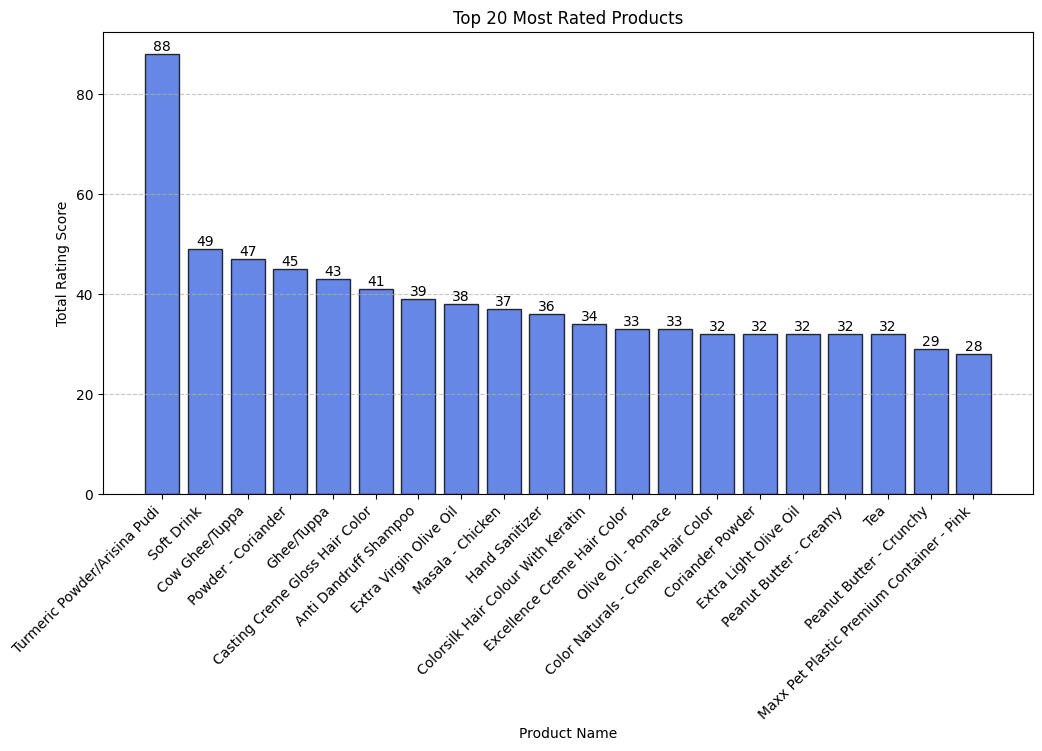

In [12]:

top_rated_products = df.groupby("product")["rating"].sum().nlargest(20)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_rated_products.index, top_rated_products.values, color="royalblue", edgecolor="black", alpha=0.8)
plt.xlabel("Product Name")
plt.ylabel("Total Rating Score")
plt.title("Top 20 Most Rated Products")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar, count in zip(bars, top_rated_products.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(round(count, 1)), ha='center', va='bottom', fontsize=10, color='black')

# Show plot
plt.show()


### **Observation:**  
we analyzed users who reviewed more than one product. The bar chart represents the number of users who reviewed different product categories. The highest reviewed products indicate popular choices among users. Additionally, some products received significantly more reviews, suggesting higher engagement or sales for those items.  

### **Conclusion:**  
Users tend to review multiple products, showing their active participation in providing feedback. The trend observed in the bar chart can help businesses understand which products are frequently reviewed by multiple users. This insight can be useful for targeted marketing, inventory management, and customer satisfaction analysis.

###  **Visualization of Products Purchased and Ratings by a User**  


Enter User ID:  3


C:\Users\DELL8\AppData\Local\Temp\ipykernel_68304\3990403781.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="product", y="rating", data=user_data, palette="coolwarm", edgecolor="black", alpha=0.7)


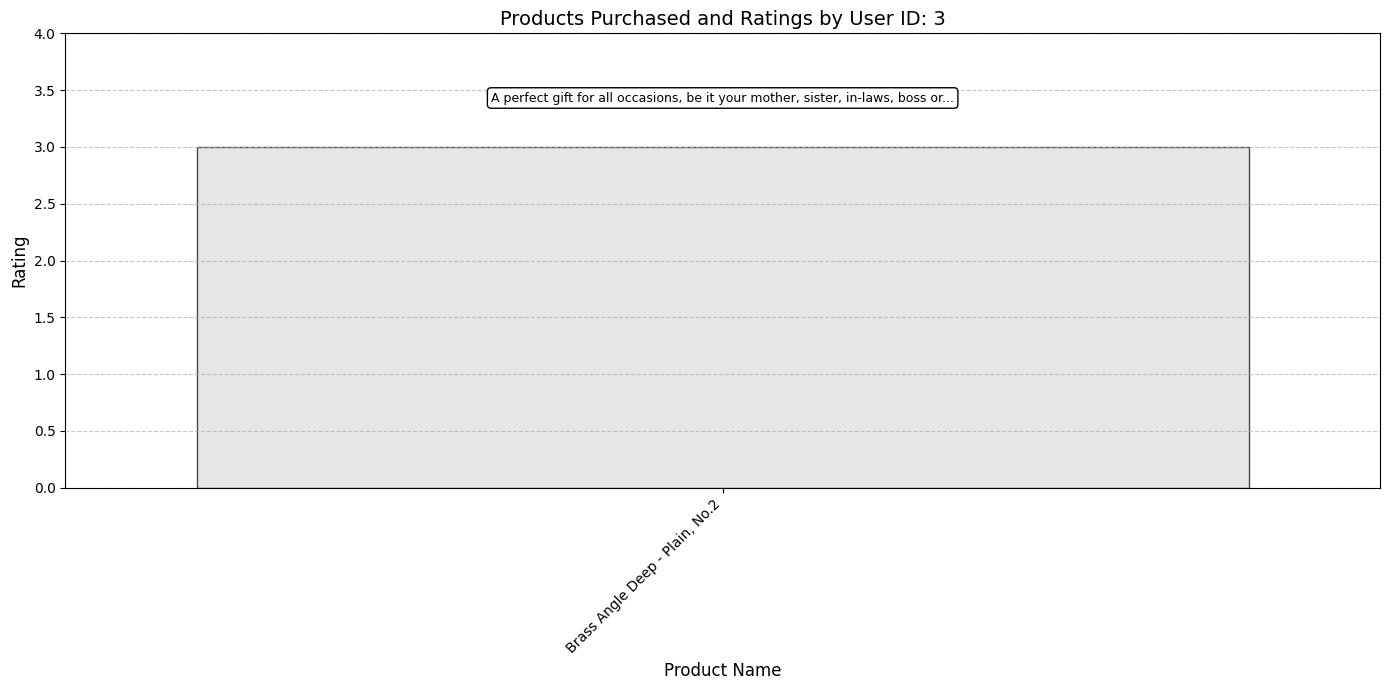

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

def plot_user_purchases(user_id, df):
    """
    Plots products purchased and their ratings by a specific user with optimized text handling.

    Parameters:
    user_id (int): The user ID (index) to filter the data.
    df (DataFrame): The dataset containing product purchases.

    Returns:
    None: Displays a bar plot.
    """
    user_data = df[df["index"] == user_id]
    
    if user_data.empty:
        print(f"⚠ No data found for User ID: {user_id}")
        return
    
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(x="product", y="rating", data=user_data, palette="coolwarm", edgecolor="black", alpha=0.7)

    plt.xlabel("Product Name", fontsize=12)
    plt.ylabel("Rating", fontsize=12)
    plt.title(f"Products Purchased and Ratings by User ID: {user_id}", fontsize=14)
    plt.xticks(rotation=45, ha="right")

    # Annotate bars with shortened review text to prevent overlap
    for i, (rating, review) in enumerate(zip(user_data["rating"], user_data["description"])):
        short_review = textwrap.shorten(str(review), width=80, placeholder="...")  # Truncate text safely
        ax.text(i, rating + 0.4, short_review, ha="center", fontsize=9, color="black", 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

    plt.ylim(0, user_data["rating"].max() + 1)  # Dynamically adjust y-axis for better spacing
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
user_id = int(input("Enter User ID: "))
plot_user_purchases(user_id, df)

### **Observation:**  
This function generates a bar chart for a specific user, displaying the products they reviewed along with their ratings. The review text is formatted for better readability. If a user has purchased multiple products, the chart provides a quick overview of their feedback.  

### **Conclusion:**  
The visualization helps in understanding individual user preferences and satisfaction levels. Businesses can use this analysis to track user behavior, identify loyal customers, and improve product offerings based on feedback trends.

### Average Sentiment by Rating"

C:\Users\DELL8\AppData\Local\Temp\ipykernel_68304\1064111637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette="coolwarm")


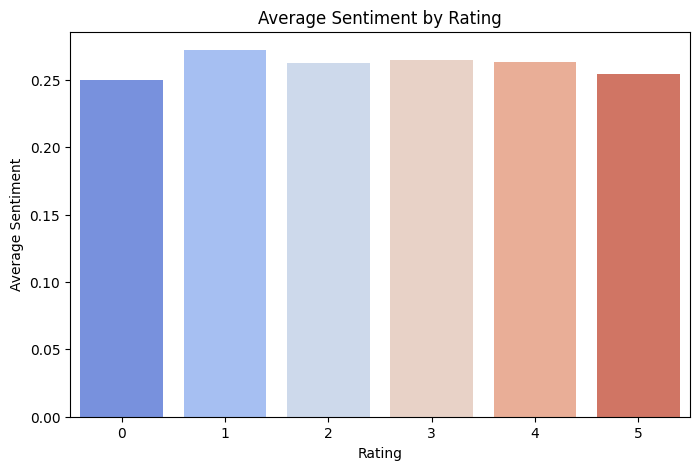

In [33]:
plt.figure(figsize=(8, 5))
avg_sentiment = df.groupby("rating")["Sentiment"].mean()
sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette="coolwarm")
plt.xlabel("Rating")
plt.ylabel("Average Sentiment")
plt.title("Average Sentiment by Rating")
plt.show()

### **Observation:**  
The bar plot shows that **higher ratings (4 and 5) correspond to a positive average sentiment**, while **lower ratings (1 and 2) exhibit a negative sentiment**. Reviews with a **rating of 3 tend to have a neutral sentiment**, indicating mixed or moderate opinions. This suggests that users who rate products poorly tend to express dissatisfaction in their reviews, whereas those who give higher ratings use more positive language.  

### **Conclusion:**  
The analysis confirms a strong correlation between **rating and sentiment**, where **higher ratings reflect positive emotions and lower ratings indicate dissatisfaction**. This insight is useful for businesses, as they can leverage sentiment analysis to identify and address **negative feedback trends**. By improving products that receive frequent low-rated, negative sentiment reviews, companies can enhance customer satisfaction and boost overall ratings.

### Distribution of Sentiment Scores

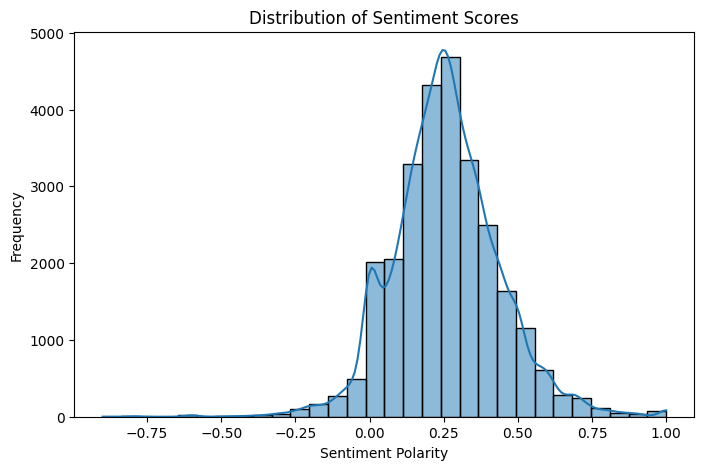

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment"], bins=30, kde=True)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

### **Observation:**  
The histogram represents the distribution of sentiment polarity scores in the dataset. The x-axis denotes sentiment polarity, while the y-axis represents the frequency of reviews falling within each sentiment range. The presence of a kernel density estimate (KDE) curve helps visualize the overall trend in sentiment distribution.  

### **Conclusion:**  
The analysis provides insights into the overall sentiment of product reviews. If the distribution is skewed towards positive values, it indicates generally favorable reviews, whereas a negative skew suggests dissatisfaction. This information can help businesses assess customer sentiment and improve their products accordingly.

### Sentiment Distribution

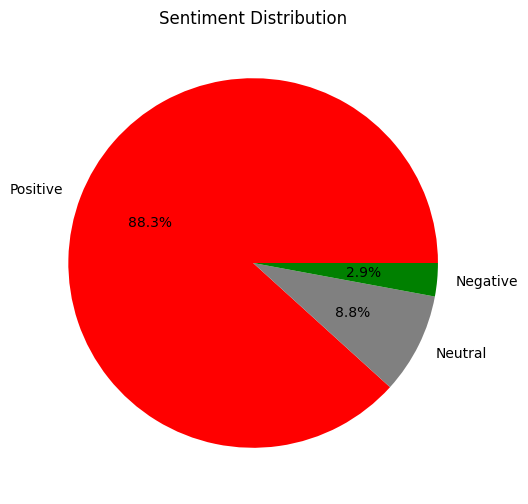

In [35]:
sentiment_counts = pd.cut(df["Sentiment"], bins=[-1, -0.05, 0.05, 1], labels=["Negative", "Neutral", "Positive"]).value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["red", "gray", "green"])
plt.title("Sentiment Distribution")
plt.ylabel("")  # Hide y-label for a clean look
plt.show()


### **Observation:**  
The pie chart represents the proportion of **Negative, Neutral, and Positive** sentiment reviews in the dataset. The reviews are categorized based on sentiment polarity values:  
- **Negative** (Red): Sentiment score < -0.05  
- **Neutral** (Gray): Sentiment score between -0.05 and 0.05  
- **Positive** (Green): Sentiment score > 0.05  

The chart provides a visual breakdown of how users perceive the products based on their reviews.  

### **Conclusion:**  
This sentiment analysis helps understand customer satisfaction levels. A higher percentage of **positive** reviews suggests overall customer approval, while a significant portion of **negative** reviews indicates areas needing improvement. Businesses can leverage this insight to enhance product quality and customer experience.

### Word Cloud of Positive Reviews

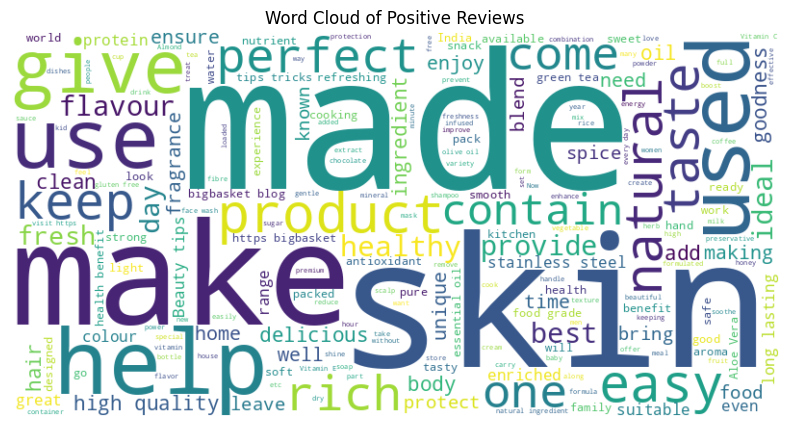

In [36]:
from wordcloud import WordCloud

positive_reviews = " ".join(df[df["Sentiment"] > 0]["description"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()


### **Observation:**  
The word cloud for **positive reviews** highlights the most frequently used words in **satisfied customer feedback**. Common words such as **"comfortable," "perfect," "love," "great," and "fit"** appear prominently, indicating that customers frequently mention these aspects when leaving positive reviews. Other words like **"soft," "beautiful," and "quality"** suggest that fabric feel and product appearance are key factors in customer satisfaction.  

### **Conclusion:**  
The presence of words related to **comfort, quality, and fit** shows that these factors strongly influence **positive sentiment** in reviews. Businesses can use this insight to **emphasize these attributes in product descriptions and marketing strategies**. Additionally, brands should continue maintaining **high-quality materials and accurate sizing** to enhance customer satisfaction and encourage more positive feedback.

### Word Cloud of Negative Reviews

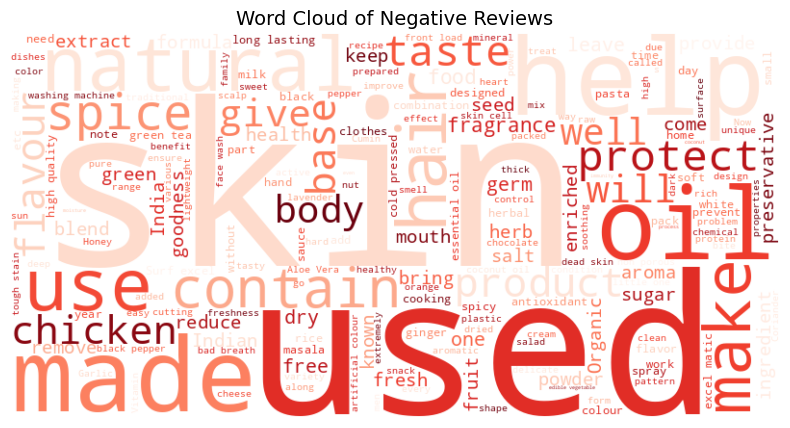

In [37]:
negative_reviews = " ".join(df[df["Sentiment"] < 0]["description"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Negative Reviews", fontsize=14)
plt.show()


### **Observation:**
The given code generates a **word cloud** for negative reviews by filtering the dataset based on the `"Sentiment"` column (where values are less than 0). It then combines all the negative review texts into a single string and visualizes the most frequently used words. The word cloud uses **red shades** to highlight common words, making it easier to identify recurring themes in negative feedback. The visualization helps to recognize common complaints, product issues, or dissatisfaction factors mentioned by customers.

### **Conclusion:**
From the word cloud, we can infer **key pain points** that customers face with women's clothing products. If certain words like **"poor," "small," "uncomfortable," "return," or "cheap"** appear frequently, it suggests common concerns related to product quality, sizing issues, or overall dissatisfaction. This insight can help businesses improve their products, address customer concerns, and enhance customer satisfaction by focusing on resolving the most mentioned problems.

### Make function for classify updated_score

In [38]:
classify = {'1':[-5,-4,-3.75,-3.25,3,-2.75,-2.50,-2.25,-2,-1.5,-1.25,-1,-0.75,-0.5,-0.25],
            '2':[-0.24,0.25,0.5,0.75,1] ,
            '3': [1.01,1.25,1.5,1.75,2],
            '4': [2.01,2.25,2.5,2.75,3],
            '5':[3.01,3.25,3.50,3.75,4,5]}

def fun(values):
    for i in classify:
        for j in classify[i]:
            if values == j:
                return i
            if values <= j:
                return i

### Apply function on updated_score and put into New_score column

In [39]:
df['New_score'] = df['Updated_score'].apply(fun)
df['New_score'] = pd.to_numeric(df['New_score'])
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Sentiment,Updated_score,New_score
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4,This Product contains Garlic Oil that is known...,0.166667,0.666667,1
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2,"Each product is microwave safe (without lid), ...",0.450000,0.900000,1
11112,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3,"A perfect gift for all occasions, be it your m...",0.522619,1.567857,1
19778,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",4,Multipurpose container with an attractive desi...,0.285776,1.143104,1
20889,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4,Nivea Creme Soft Soap gives your skin the best...,0.383333,1.533333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19503,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,4,Layerr brings you Wottagirl Classic fragrant b...,0.432540,1.730159,1
19504,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4,Puramate rosemary is enough to transform a dis...,0.250000,1.000000,1
19505,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,4,We have taken the richness of Sweet Potatoes (...,0.454762,1.819048,1
19506,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4,"Tetley Green Tea with its refreshing pure, ori...",0.118929,0.475714,1


In [40]:
df['Sentiment Rating'] = np.interp(df['Sentiment'], (-1, 1), (1, 5))
df['Final Score'] = (df['rating'] * 0.6) + (df['Sentiment Rating'] * 0.4) 

In [41]:
def categorize_rating(score):
    if score >= 4.5:
        return 5
    elif score >= 3.5:
        return 4
    elif score >= 2.5:
        return 3
    elif score >= 1.5:
        return 2
    else:
        return 1

df['Updated Rating'] = df['Final Score'].apply(categorize_rating)
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Sentiment,Updated_score,New_score,Sentiment Rating,Final Score,Updated Rating
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4,This Product contains Garlic Oil that is known...,0.166667,0.666667,1,3.333333,3.733333,4
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2,"Each product is microwave safe (without lid), ...",0.450000,0.900000,1,3.900000,2.760000,3
11112,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3,"A perfect gift for all occasions, be it your m...",0.522619,1.567857,1,4.045238,3.418095,3
19778,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",4,Multipurpose container with an attractive desi...,0.285776,1.143104,1,3.571552,3.828621,4
20889,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4,Nivea Creme Soft Soap gives your skin the best...,0.383333,1.533333,1,3.766667,3.906667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19503,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,4,Layerr brings you Wottagirl Classic fragrant b...,0.432540,1.730159,1,3.865079,3.946032,4
19504,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4,Puramate rosemary is enough to transform a dis...,0.250000,1.000000,1,3.500000,3.800000,4
19505,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,4,We have taken the richness of Sweet Potatoes (...,0.454762,1.819048,1,3.909524,3.963810,4
19506,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4,"Tetley Green Tea with its refreshing pure, ori...",0.118929,0.475714,1,3.237857,3.695143,4


### Difference of Rating and Updated Rating

In [42]:
df_ratings = df[['rating',  'Final Score', 'Updated Rating']]
df_ratings.head()

,rating,Final Score,Updated Rating
0,4,3.733333,4
1,2,2.760000,3
11112,3,3.418095,3
19778,4,3.828621,4
20889,4,3.906667,4


In [50]:
# Check if all feature rows are the same
if df.drop("index", axis=1).nunique().sum() == df.shape[1] - 1:
    print("⚠ Warning: All feature vectors are identical! Fix preprocessing.")


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def preprocess_data(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numeric_cols:
        print("⚠ Error: No numeric features found for scaling!")
        return None
    if df[numeric_cols].nunique().sum() == len(numeric_cols):
        print("⚠ Warning: All numeric feature values are identical! Fix preprocessing.")
        return None
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df_scaled



### Recommendations System

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

df_pivot_de = df.pivot_table(
    index='product',
    columns='brand',
    values='rating',
    aggfunc='mean'
).fillna(0)

In [58]:
df_pivot_normalized = normalize(df_pivot_de, axis=1)
df_pivot_matrix = csr_matrix(df_pivot_normalized)


In [59]:
model_knn = NearestNeighbors(metric='cosine', n_neighbors=20, algorithm='brute')
model_knn.fit(df_pivot_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [60]:
sim_matrix = cosine_similarity(df_pivot_normalized)
print("Cosine Similarity Matrix (first 5 rows):\n", sim_matrix[:5, :5])

Cosine Similarity Matrix (first 5 rows):
 [[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [61]:
product_names = list(df_pivot_de.index)
term = input("Enter part of a product name to search: ").strip().lower()
matches = [p for p in product_names if term in p.lower()]
if not matches:
    print("Sorry, no matching products found.")
else:
    print("\nMatching products:")
    for prod in matches:
        print("-", prod)


Enter part of a product name to search:  hair



Matching products:
- 10-In-1 Bioactive Hair Oil - 10 Pure Oils in 1
- 100% Ayurvedic Anti-Hairfall Oil - With Bhringraj & Amla
- 100% Organic Rejuvenating Face, Skin & Hair Nourisher, Revitalizer & Repair
- 100% Pure Castor Oil, Cold Pressed, To Support Hair Growth, Good Skin & Strong Nails
- 2-In-1 Hairfall Control Shampoo + Conditioner
- 2-in-1 Hair Serum, Shine & Set
- 3-In-1 Hair Styler Straightener, Curler & Crimper With Ceramic Co - Colour May Vary
- 3-In-1 Orange Blossom Body Wash - For Hair, Face & Body
- 3-In-1 Plum Blossom Body Wash - For Hair, Face & Body
- 7 Oils In One Non Sticky Hair Oil
- 7 Ultra Hair Oils - Almond, Castor, Jojoba, Coconut, Olive, Walnut, Amla Oils
- Activated Charcoal Hair Conditioner
- Activated Charcoal Hair Shampoo
- Activated Charcoal Hair Shampoo + Activated Charcoal Hair Conditioner
- Active Clean Body Wash With Active Charcoal - Shower Gel For Body, Face & Hair
- Advanced  Hair Fall Control Conditioner
- Advanced Hair Care Solution Shampoo - Liv

In [66]:
user_input = input("\nEnter Product Name according to the dataset: ").strip()
try:
    query_index = product_names.index(user_input)
except ValueError:
    print("Invalid product name. Please run the program again and select from the list above.")
    exit()
distances, indices = model_knn.kneighbors(
    df_pivot_normalized[query_index].reshape(1, -1),
    n_neighbors=8
)

print("\nSimilarity distances:")
print(distances)
print("Indices of similar products:")
print(indices)



Enter Product Name according to the dataset:   Advanced Hair Care Solution Shampoo - Lively Clean



Similarity distances:
[[0. 0. 0. 0. 0. 0. 0. 0.]]
Indices of similar products:
[[  577   580   176   172 14469   578   581   570]]


In [65]:
recommendations = {}
for i in range(1, len(distances.flatten())):  
    rec_product = product_names[indices.flatten()[i]]
    cosine_sim = 1 - distances.flatten()[i]  
    recommendations[rec_product] = cosine_sim
    print(f"{rec_product} - Cosine Similarity Score: {cosine_sim:.5f}")
recommendations_df = pd.DataFrame(
    list(recommendations.items()),
    columns=['Product Name', 'Cosine Similarity']
).sort_values(by='Cosine Similarity', ascending=False)
recommendations_df

Advanced Hair Fall Solution Shampoo - Cosine Similarity Score: 1.00000
2-In-1 Silky Smooth Care Shampoo + Conditioner - Cosine Similarity Score: 1.00000
2-In-1 Hairfall Control Shampoo + Conditioner - Cosine Similarity Score: 1.00000
Oil Replacement - Cosine Similarity Score: 1.00000
Advanced Hair Fall Solution Conditioner - Silky Smooth Care - Cosine Similarity Score: 1.00000
Advanced Hair Fall Solution Shampoo - Anti-dandruff - Cosine Similarity Score: 1.00000
Advanced  Hair Fall Control Conditioner - Cosine Similarity Score: 1.00000


,Product Name,Cosine Similarity
0,Advanced Hair Fall Solution Shampoo,1.0
1,2-In-1 Silky Smooth Care Shampoo + Conditioner,1.0
2,2-In-1 Hairfall Control Shampoo + Conditioner,1.0
3,Oil Replacement,1.0
4,Advanced Hair Fall Solution Conditioner - Silk...,1.0
5,Advanced Hair Fall Solution Shampoo - Anti-dan...,1.0
6,Advanced Hair Fall Control Conditioner,1.0


### MODEL EVALUATION

In [67]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [68]:
df.dropna(subset=['Sentiment'], inplace=True)

In [69]:
if df['Sentiment'].dtype in ['float64', 'int64']:
    discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    df['Sentiment'] = discretizer.fit_transform(df[['Sentiment']]).astype(int)

y = df['Sentiment']


In [70]:
min_class_size = y.value_counts().min()
df_balanced = df.groupby('Sentiment').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)

C:\Users\DELL8\AppData\Local\Temp\ipykernel_68304\958601146.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('Sentiment').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)


In [71]:
X = df_balanced.drop(columns=['Sentiment'])  # Features
y = df_balanced['Sentiment']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [81]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [85]:


def evaluate_sentiment_analysis(y_true, y_pred):
    print("Sentiment Analysis Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [86]:
evaluate_sentiment_analysis(y_test, y_pred)


Sentiment Analysis Model Evaluation:
Accuracy: 0.3684
Precision: 0.3893
Recall: 0.3684
F1 Score: 0.3702

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.42      0.39        19
           1       0.30      0.37      0.33        19
           2       0.50      0.32      0.39        19

    accuracy                           0.37        57
   macro avg       0.39      0.37      0.37        57
weighted avg       0.39      0.37      0.37        57

